# COVID


**ESTO NO PRETENDE SER UN ESTUDIO RIGUROSO SOBRE EL COVID SOLO SON ESTADÍSTICOS DESCRIPTIVOS CALCULADOS CON MAYOR O MENOR ACIERTO SOBRE LOS DATOS DE ISCIII. ES CONVENIENTE ABSTENERSE DE OBTENER CONCLUSIÓN ALGUNA DE ANÁLISIS "AFICIONADOS" SOBRE MATERIAS TAN ESPECÍFICAS CIENTÍFICAMENTE.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
!wget https://covid19.isciii.es/resources/serie_historica_acumulados.csv
!mv serie_historica_acumulados.csv data/
# !wget https://ourworldindata.org/630a1859-6c13-4efc-ba0e-e8c29dc4a647

--2020-06-21 12:07:20--  https://covid19.isciii.es/resources/serie_historica_acumulados.csv
Resolving covid19.isciii.es (covid19.isciii.es)... 193.146.50.140, 193.146.52.140
Connecting to covid19.isciii.es (covid19.isciii.es)|193.146.50.140|:443... connected.
HTTP request sent, awaiting response... 302 Object moved
Location: https://cnecovid.isciii.es/covid19/resources/agregados.csv [following]
--2020-06-21 12:07:20--  https://cnecovid.isciii.es/covid19/resources/agregados.csv
Resolving cnecovid.isciii.es (cnecovid.isciii.es)... 193.146.50.165
Connecting to cnecovid.isciii.es (cnecovid.isciii.es)|193.146.50.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56090 (55K) [application/octet-stream]
Saving to: 'serie_historica_acumulados.csv'

serie_historica_acu 100%[===================>]  54.78K  --.-KB/s    in 0.03s   

2020-06-21 12:07:21 (1.65 MB/s) - 'serie_historica_acumulados.csv' saved [56090/56090]



In [3]:
!ls data

02002.csv			 serie_historica_acumulados.csv
2915bsc.csv			 total-covid-deaths-per-million.csv
nacional_covid19_rango_edad.csv  total-daily-covid-deaths-per-million.csv


In [4]:
df = pd.read_csv(
#     URL,
    os.path.join('data', 'serie_historica_acumulados.csv'), 
                      engine='python',
                      skipfooter=9)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.fecha = pd.to_datetime(df.fecha, format='%d/%m/%Y')
df.sort_values('fecha', inplace=True)
df

ccaa      fecha  casos   pcr+  testac+  hospitalizados     uci  \
0      AN 2020-02-20    0.0      0      NaN             NaN     NaN   
18     RI 2020-02-20    NaN      0      NaN             NaN     NaN   
17     PV 2020-02-20    NaN      0      NaN             NaN     NaN   
16     NC 2020-02-20    NaN      0      NaN             NaN     NaN   
15     MC 2020-02-20    NaN      0      NaN             NaN     NaN   
...   ...        ...    ...    ...      ...             ...     ...   
1711   AR 2020-05-20    NaN   5588   1751.0          2442.0   256.0   
1710   AN 2020-05-20    NaN  12547   3999.0          6210.0   766.0   
1727   PV 2020-05-20    NaN  13421   5358.0          7032.0   578.0   
1718   CT 2020-05-20    NaN  55888   1643.0         29497.0  2969.0   
1728   RI 2020-05-20    NaN   4033   1395.0          1504.0    91.0   

      fallecidos  
0            NaN  
18           NaN  
17           NaN  
16           NaN  
15           NaN  
...          ...  
1711       848.0  
1710      1375.0  
1727      1483.0  
1718      6021.0  
1728       354.0  

[1729 rows x 8 columns]

In [5]:
df.fecha.max()

Timestamp('2020-05-20 00:00:00')

In [6]:
valid_dates = df.groupby('fecha').ccaa.nunique().eq(19)
valid_dates

fecha
2020-02-20    True
2020-02-21    True
2020-02-22    True
2020-02-23    True
2020-02-24    True
              ... 
2020-05-16    True
2020-05-17    True
2020-05-18    True
2020-05-19    True
2020-05-20    True
Name: ccaa, Length: 91, dtype: bool

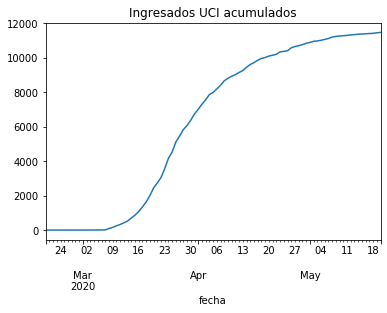

In [7]:
groupby_uci_df = df.groupby('fecha').uci.sum()
groupby_uci_df = groupby_uci_df[valid_dates]
groupby_uci_df.plot(title='Ingresados UCI acumulados');

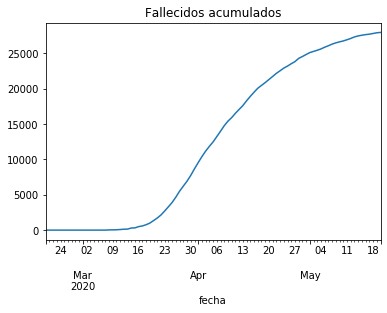

In [8]:
groupby_fallecidos_df = df.groupby('fecha').fallecidos.sum()
groupby_fallecidos_df = groupby_fallecidos_df[valid_dates]
groupby_fallecidos_df.plot(title='Fallecidos acumulados');

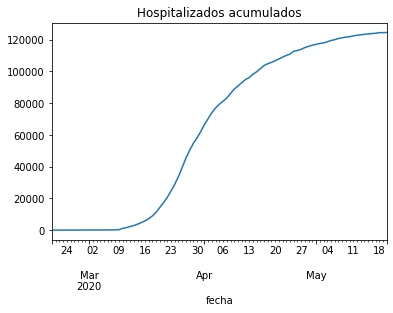

In [9]:
groupby_ingresados_df = df.groupby('fecha').hospitalizados.sum()
groupby_ingresados_df = groupby_ingresados_df[valid_dates]
groupby_ingresados_df.plot(title='Hospitalizados acumulados');

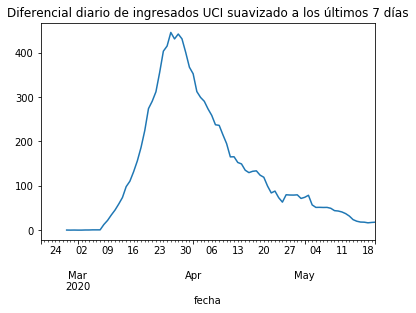

In [10]:
smoothed_differential_uci_incoming = groupby_uci_df.diff().rolling(7).mean()
(smoothed_differential_uci_incoming
.plot(title='Diferencial diario de ingresados UCI suavizado a los últimos 7 días'));

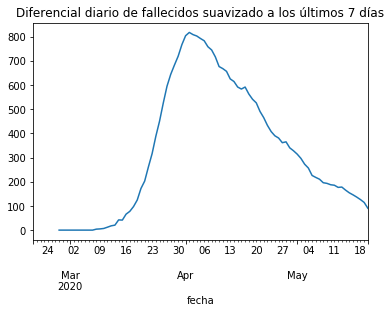

In [11]:
smoothed_differential_fallecidos_incoming = groupby_fallecidos_df.diff().rolling(7).mean()
(smoothed_differential_fallecidos_incoming
.plot(title='Diferencial diario de fallecidos suavizado a los últimos 7 días'));

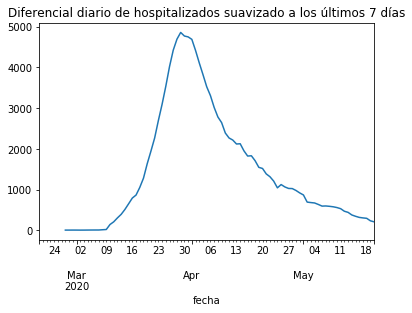

In [12]:
smoothed_differential_hospitalizados_incoming = groupby_ingresados_df.diff().rolling(7).mean()

(smoothed_differential_hospitalizados_incoming
.plot(title='Diferencial diario de hospitalizados suavizado a los últimos 7 días'));

In [13]:
smoothed_differential_fallecidos_incoming.idxmax()

Timestamp('2020-04-02 00:00:00')

In [14]:
smoothed_differential_hospitalizados_incoming.idxmax()

Timestamp('2020-03-29 00:00:00')

In [15]:
smoothed_differential_fallecidos_incoming.idxmax()

Timestamp('2020-04-02 00:00:00')

# Población

In [16]:
groupby_fallecidos_df.tail(1)

fecha
2020-05-20    27940.0
Name: fallecidos, dtype: float64

In [17]:
!ls data/

02002.csv			 serie_historica_acumulados.csv
2915bsc.csv			 total-covid-deaths-per-million.csv
nacional_covid19_rango_edad.csv  total-daily-covid-deaths-per-million.csv


In [18]:
!pip install unidecode

In [19]:
import unidecode

unaccent = lambda accented_string: unidecode.unidecode(accented_string)

pob_df = pd.read_csv(os.path.join('data', '2915bsc.csv'), 
                     sep=';', 
                     thousands='.',
                     encoding='latin-1')
pob_df.columns = pob_df.columns.str.lower().str.replace(' ', '_').map(unaccent)
pob_df.rename(columns={'comunidades_y_ciudades_autonomas': 'ccaa_raw',
                       'total': 'poblacion'}, inplace=True)
total_spain_pob = pob_df.iloc[0].poblacion
pob_df = pob_df.iloc[1:]
total_spain_pob

47026208

In [20]:
df.ccaa.nunique()

19

In [21]:
df.ccaa.unique()

array(['AN', 'RI', 'PV', 'NC', 'MC', 'ML', 'GA', 'EX', 'VC', 'MD', 'CT',
       'CE', 'AS', 'IB', 'CN', 'AR', 'CM', 'CL', 'CB'], dtype=object)

In [22]:
ccaa_list = ['AN', 'AR', 'AS', 'IB', 'CN', 'CB',
                  'CL', 'CM', 'CT', 'VC', 'EX',
                  'GA', 'MD', 'MC', 'NC', 'PV', 'RI',
                  'CE', 'ML']
pob_df.insert(1, 'ccaa', ccaa_list)

In [23]:
ccaa_set = set(ccaa_list)
ccaa_set.symmetric_difference(set(df.ccaa.unique())
                         )

set()

In [24]:
pob_df

ccaa_raw ccaa tamano_de_los_municipios  periodo  \
1                     01 Andalucía   AN                    Total     2019   
2                        02 Aragón   AR                    Total     2019   
3       03 Asturias, Principado de   AS                    Total     2019   
4                04 Balears, Illes   IB                    Total     2019   
5                      05 Canarias   CN                    Total     2019   
6                     06 Cantabria   CB                    Total     2019   
7               07 Castilla y León   CL                    Total     2019   
8          08 Castilla - La Mancha   CM                    Total     2019   
9                      09 Cataluña   CT                    Total     2019   
10         10 Comunitat Valenciana   VC                    Total     2019   
11                  11 Extremadura   EX                    Total     2019   
12                      12 Galicia   GA                    Total     2019   
13         13 Madrid, Comunidad de   MD                    Total     2019   
14            14 Murcia, Región de   MC                    Total     2019   
15  15 Navarra, Comunidad Foral de   NC                    Total     2019   
16                   16 País Vasco   PV                    Total     2019   
17                    17 Rioja, La   RI                    Total     2019   
18                        18 Ceuta   CE                    Total     2019   
19                      19 Melilla   ML                    Total     2019   

    poblacion  
1     8414240  
2     1319291  
3     1022800  
4     1149460  
5     2153389  
6      581078  
7     2399548  
8     2032863  
9     7675217  
10    5003769  
11    1067710  
12    2699499  
13    6663394  
14    1493898  
15     654214  
16    2207776  
17     316798  
18      84777  
19      86487

In [25]:
pob_df.ccaa.nunique()

19

In [26]:
df = pd.merge(df, pob_df[['ccaa', 'poblacion']], on='ccaa', how='left')

In [27]:
df['fallecidos_por_millon'] = df.fallecidos.div(df.poblacion.div(1e6))

In [28]:
df.head()

ccaa      fecha  casos  pcr+  testac+  hospitalizados  uci  fallecidos  \
0   AN 2020-02-20    0.0     0      NaN             NaN  NaN         NaN   
1   RI 2020-02-20    NaN     0      NaN             NaN  NaN         NaN   
2   PV 2020-02-20    NaN     0      NaN             NaN  NaN         NaN   
3   NC 2020-02-20    NaN     0      NaN             NaN  NaN         NaN   
4   MC 2020-02-20    NaN     0      NaN             NaN  NaN         NaN   

   poblacion  fallecidos_por_millon  
0    8414240                    NaN  
1     316798                    NaN  
2    2207776                    NaN  
3     654214                    NaN  
4    1493898                    NaN

In [29]:
last_date = df.loc[df.fecha.eq(df.fecha.max())].copy()

In [30]:
last_date['meseta_española'] = last_date.ccaa.isin(['MD', 'CM', 'CL'])

In [31]:
media_fallecidos_por_millon_esp = last_date.fallecidos.sum() / total_spain_pob * 1e6
media_fallecidos_por_millon_esp

594.1367843224783

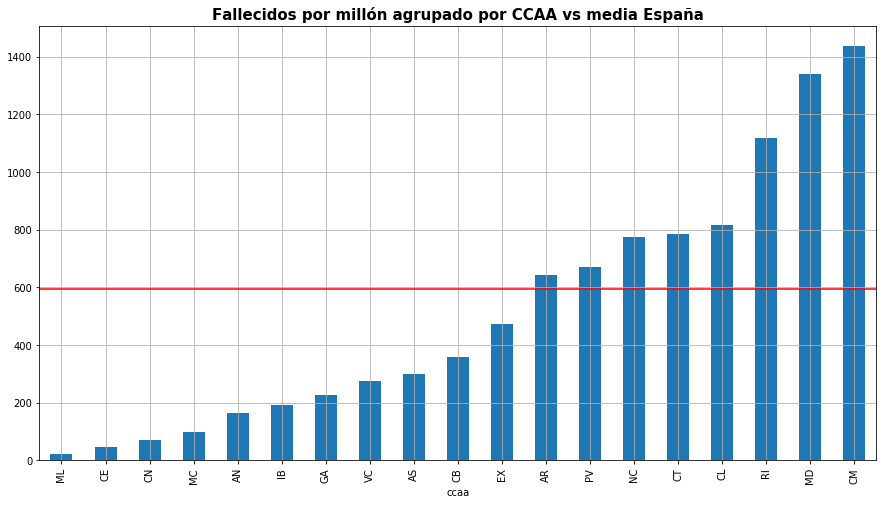

In [32]:
%matplotlib inline
last_date.set_index('ccaa').fallecidos_por_millon.sort_values().plot.bar(figsize=(15, 
                                                                                  8));
plt.axhline(media_fallecidos_por_millon_esp, c='r');
plt.title('Fallecidos por millón agrupado por CCAA vs media España', fontsize=15, fontweight='bold');
plt.grid()

In [33]:
last_date.groupby('meseta_española').fallecidos_por_millon.describe()

count         mean         std         min          25%  \
meseta_española                                                            
False             16.0   388.872978  322.378351   23.124863   147.494857   
True               3.0  1197.678123  333.277870  816.820501  1078.564229   

                         50%          75%          max  
meseta_española                                         
False             288.274045   650.006290  1117.431297  
True             1340.307957  1388.106935  1435.905912

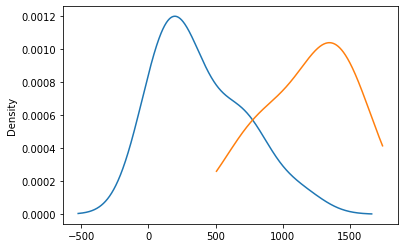

In [34]:
last_date.groupby('meseta_española').fallecidos_por_millon.plot.kde();

In [35]:
last_date.fallecidos_por_millon.mean()

516.5790537268471

In [36]:
last_date.sort_values('fallecidos_por_millon', ascending=False)

ccaa      fecha  casos   pcr+  testac+  hospitalizados     uci  \
1720   CM 2020-05-20    NaN  16789   8634.0          9138.0   639.0   
1716   MD 2020-05-20    NaN  67049   5293.0         42497.0  3617.0   
1728   RI 2020-05-20    NaN   4033   1395.0          1504.0    91.0   
1719   CL 2020-05-20    NaN  18627   6291.0          8735.0   561.0   
1727   CT 2020-05-20    NaN  55888   1643.0         29497.0  2969.0   
1712   NC 2020-05-20    NaN   5195   3157.0          2048.0   136.0   
1726   PV 2020-05-20    NaN  13421   5358.0          7032.0   578.0   
1724   AR 2020-05-20    NaN   5588   1751.0          2442.0   256.0   
1710   EX 2020-05-20    NaN   3042   1001.0          1780.0   110.0   
1721   CB 2020-05-20    NaN   2279    519.0          1036.0    79.0   
1723   AS 2020-05-20    NaN   2374    985.0          1089.0   121.0   
1715   VC 2020-05-20    NaN  10987   3810.0          5747.0   730.0   
1711   GA 2020-05-20    NaN   9077   2026.0          2943.0   334.0   
1722   IB 2020-05-20    NaN   2024    107.0          1144.0   169.0   
1725   AN 2020-05-20    NaN  12547   3999.0          6210.0   766.0   
1714   MC 2020-05-20    NaN   1570   1039.0           680.0   112.0   
1718   CN 2020-05-20    NaN   2307      0.0           944.0   179.0   
1717   CE 2020-05-20    NaN    119     59.0            11.0     4.0   
1713   ML 2020-05-20    NaN    121     13.0            44.0     3.0   

      fallecidos  poblacion  fallecidos_por_millon  meseta_española  
1720      2919.0    2032863            1435.905912             True  
1716      8931.0    6663394            1340.307957             True  
1728       354.0     316798            1117.431297            False  
1719      1960.0    2399548             816.820501             True  
1727      6021.0    7675217             784.472934            False  
1712       506.0     654214             773.447221            False  
1726      1483.0    2207776             671.716696            False  
1724       848.0    1319291             642.769488            False  
1710       505.0    1067710             472.974871            False  
1721       209.0     581078             359.676326            False  
1723       307.0    1022800             300.156433            False  
1715      1383.0    5003769             276.391656            False  
1711       608.0    2699499             225.226977            False  
1722       221.0    1149460             192.264194            False  
1725      1375.0    8414240             163.413451            False  
1714       149.0    1493898              99.739072            False  
1718       155.0    2153389              71.979563            False  
1717         4.0      84777              47.182608            False  
1713         2.0      86487              23.124863            False

In [37]:
last_date.loc[~last_date.ccaa.isin(['MD', 'CM', 'CL']), 'fallecidos_por_millon'].mean()

388.8729781520415

# Fallecidos por millon y país

https://ourworldindata.org/grapher/total-covid-deaths-per-million

In [38]:
!ls data/

02002.csv			 serie_historica_acumulados.csv
2915bsc.csv			 total-covid-deaths-per-million.csv
nacional_covid19_rango_edad.csv  total-daily-covid-deaths-per-million.csv


In [39]:
count_df = pd.read_csv(os.path.join('data', 'total-covid-deaths-per-million.csv'), 
                       parse_dates=['Date'])
count_df.columns = count_df.columns.str.lower().str.replace(' ', '_').map(unaccent)
count_df.rename(columns={'total_confirmed_deaths_due_to_covid-19_per_million_people_(deaths_per_million)':
                         'fallecidos_por_millon'}, inplace=True)
count_df

entity code       date  fallecidos_por_millon
0      Afghanistan  AFG 2019-12-31                  0.000
1      Afghanistan  AFG 2020-01-01                  0.000
2      Afghanistan  AFG 2020-01-02                  0.000
3      Afghanistan  AFG 2020-01-03                  0.000
4      Afghanistan  AFG 2020-01-04                  0.000
...            ...  ...        ...                    ...
24511     Zimbabwe  ZWE 2020-06-16                  0.269
24512     Zimbabwe  ZWE 2020-06-17                  0.269
24513     Zimbabwe  ZWE 2020-06-18                  0.269
24514     Zimbabwe  ZWE 2020-06-19                  0.269
24515     Zimbabwe  ZWE 2020-06-20                  0.269

[24516 rows x 4 columns]

In [40]:
count_df.date.max()

Timestamp('2020-06-20 00:00:00')

In [41]:
count_df.dropna()
count_last_date = count_df.loc[count_df.date.eq(count_df.date.max())]
count_last_date

entity      code       date  fallecidos_por_millon
162       Afghanistan       AFG 2020-06-20                 14.077
266           Albania       ALB 2020-06-20                 14.594
434           Algeria       DZA 2020-06-20                 18.814
533           Andorra       AND 2020-06-20                673.008
624            Angola       AGO 2020-06-20                  0.243
...               ...       ...        ...                    ...
24084  Western Sahara       ESH 2020-06-20                  1.674
24257           World  OWID_WRL 2020-06-20                 59.280
24329           Yemen       YEM 2020-06-20                  8.415
24423          Zambia       ZMB 2020-06-20                  0.598
24515        Zimbabwe       ZWE 2020-06-20                  0.269

[206 rows x 4 columns]

In [42]:
count_last_date.sort_values('fallecidos_por_millon', ascending=False).head(30)

entity code       date  fallecidos_por_millon
19338      San Marino  SMR 2020-06-20               1237.551
2473          Belgium  BEL 2020-06-20                836.525
533           Andorra  AND 2020-06-20                673.008
23306  United Kingdom  GBR 2020-06-20                625.475
11651           Italy  ITA 2020-06-20                571.617
21536          Sweden  SWE 2020-06-20                500.333
8147           France  FRA 2020-06-20                453.737
23479   United States  USA 2020-06-20                359.852
16111     Netherlands  NLD 2020-06-20                354.890
11216         Ireland  IRL 2020-06-20                347.118
12017          Jersey  JEY 2020-06-20                306.709
11308     Isle of Man  IMN 2020-06-20                282.247
6822          Ecuador  ECU 2020-06-20                235.560
17810            Peru  PER 2020-06-20                232.319
3384           Brazil  BRA 2020-06-20                230.307
4293           Canada  CAN 2020-06-20                221.132
4776            Chile  CHL 2020-06-20                214.111
15397      Montserrat  MSR 2020-06-20                200.040
21709     Switzerland  CHE 2020-06-20                194.116
9609         Guernsey  GGY 2020-06-20                193.879
13691      Luxembourg  LUX 2020-06-20                175.726
14850          Mexico  MEX 2020-06-20                158.175
18196        Portugal  PRT 2020-06-20                149.754
2751          Bermuda  BMU 2020-06-20                144.525
15114          Monaco  MCO 2020-06-20                127.408
17512          Panama  PAN 2020-06-20                112.405
10874            Iran  IRN 2020-06-20                111.819
14953         Moldova  MDA 2020-06-20                111.553
1073          Armenia  ARM 2020-06-20                107.653
13855       Macedonia  MKD 2020-06-20                106.558

# Evolución de muertos por millón del COVID dentro del confinamiento

Estadístico y estadístico normalizado por densidad de población.

- Solo en comunidades con 50 fallecidos o más en ese momento
- A partir de la segunda semana tras el confinamiento.

## Suavizamos reportes de fallecidos

In [43]:
INICIO_CONFINAMIENTO = '2020-04-01'

In [44]:
inicio_conf = df.loc[df.fecha.eq(INICIO_CONFINAMIENTO)]
valid_ccaa = inicio_conf.loc[inicio_conf.fallecidos.ge(100), 'ccaa']
valid_ccaa

779    VC
780    PV
781    NC
784    MD
785    GA
786    EX
787    RI
789    CL
790    CT
791    AN
792    AR
796    CM
Name: ccaa, dtype: object

In [45]:
smoothed_df = df.set_index('fecha')
smoothed_df.sort_index(inplace=True)
smoothed_df.loc[smoothed_df.ccaa.isin(valid_ccaa)]
smoothed_df = smoothed_df.groupby('ccaa').rolling(15).mean()
smoothed_df.reset_index(inplace=True)
smoothed_df = smoothed_df.loc[smoothed_df.fecha.ge(INICIO_CONFINAMIENTO) &
                              smoothed_df.ccaa.isin(valid_ccaa)]
# smoothed_df.set_index('fecha', inplace=True)
smoothed_df

ccaa      fecha  casos          pcr+      testac+  hospitalizados  \
41     AN 2020-04-01    NaN   3577.200000          NaN     1709.466667   
42     AN 2020-04-02    NaN   4000.200000          NaN     1928.733333   
43     AN 2020-04-03    NaN   4437.533333          NaN     2155.066667   
44     AN 2020-04-04    NaN   4888.466667          NaN     2388.533333   
45     AN 2020-04-05    NaN   5344.066667          NaN     2622.066667   
...   ...        ...    ...           ...          ...             ...   
1724   VC 2020-05-16    NaN  10749.200000  3023.200000     5320.800000   
1725   VC 2020-05-17    NaN  10773.400000  3127.200000     5340.000000   
1726   VC 2020-05-18    NaN  10796.866667  3222.333333     5375.600000   
1727   VC 2020-05-19    NaN  10819.000000  3317.466667     5410.800000   
1728   VC 2020-05-20    NaN  10840.866667  3403.000000     5445.600000   

             uci   fallecidos  poblacion  fallecidos_por_millon  
41    140.800000   146.200000  8414240.0              17.375307  
42    161.666667   169.733333  8414240.0              20.172153  
43    183.400000   196.133333  8414240.0              23.309691  
44    211.466667   224.800000  8414240.0              26.716614  
45    240.400000   254.400000  8414240.0              30.234460  
...          ...          ...        ...                    ...  
1724  711.200000  1319.866667  5003769.0             263.774500  
1725  713.000000  1326.933333  5003769.0             265.186769  
1726  714.800000  1334.066667  5003769.0             266.612361  
1727  716.533333  1340.666667  5003769.0             267.931367  
1728  718.466667  1346.800000  5003769.0             269.157109  

[600 rows x 10 columns]

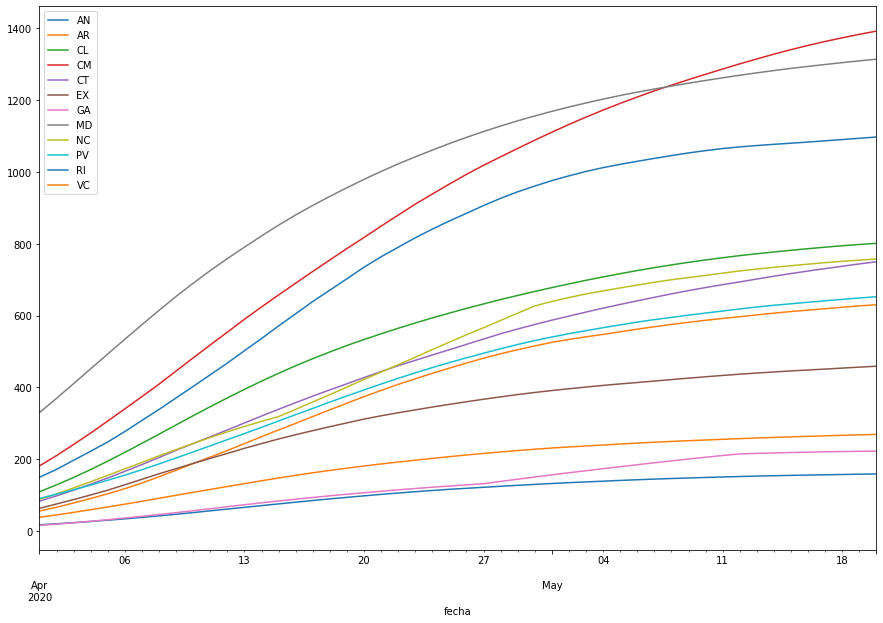

In [46]:
(smoothed_df.set_index('fecha')
            .groupby('ccaa')
            .fallecidos_por_millon
            .plot(figsize=(15, 10), legend=True));

In [47]:
pivoted_smoothed_df = pd.pivot_table(smoothed_df, index='fecha', 
                         columns='ccaa', 
                         aggfunc='mean',
                         values='fallecidos_por_millon')
pivoted_smoothed_df.head()

ccaa               AN          AR          CL          CM          CT  \
fecha                                                                   
2020-04-01  17.375307   55.737008  109.326145  181.419013   82.959652   
2020-04-02  20.172153   66.298236  128.607554  210.081381   97.995058   
2020-04-03  23.309691   78.122769  149.250331  241.137745  113.933804   
2020-04-04  26.716614   90.654753  171.254475  272.981176  130.523997   
2020-04-05  30.234460  103.793123  194.731119  306.431537  147.765638   

ccaa                EX         GA          MD          NC          PV  \
fecha                                                                   
2020-04-01   63.313072  16.052361  329.661831   88.350295   90.890863   
2020-04-02   75.301346  19.361617  369.531403  103.330103  102.697617   
2020-04-03   87.664253  23.164792  410.501515  120.246076  114.957315   
2020-04-04  100.526672  27.239622  451.891834  137.467760  127.941724   
2020-04-05  113.888603  31.635500  493.062044  155.097058  141.560255   

ccaa                RI         VC  
fecha                              
2020-04-01  149.832596  38.384399  
2020-04-02  171.718256  44.872842  
2020-04-03  197.181380  52.040772  
2020-04-04  222.223625  59.541784  
2020-04-05  248.107627  67.109413

In [48]:
reference_df = smoothed_df.set_index('fecha').loc[INICIO_CONFINAMIENTO, ['ccaa', 'fallecidos_por_millon']].copy()
reference_df.reset_index(drop=True, inplace=True)
reference_df.set_index('ccaa', inplace=True)
reference_series = reference_df.fallecidos_por_millon
reference_series

ccaa
AN     17.375307
AR     55.737008
CL    109.326145
CM    181.419013
CT     82.959652
EX     63.313072
GA     16.052361
MD    329.661831
NC     88.350295
PV     90.890863
RI    149.832596
VC     38.384399
Name: fallecidos_por_millon, dtype: float64

In [49]:
pivoted_smoothed_df.columns.equals(reference_series.index)

True

In [50]:
normalized_pivoted_smoothed_df = pivoted_smoothed_df.div(reference_series, axis='columns')
normalized_pivoted_smoothed_df.tail()

ccaa              AN         AR        CL        CM        CT        EX  \
fecha                                                                     
2020-05-16  8.970360  11.037171  7.191360  7.453905  8.727463  7.083826   
2020-05-17  9.016872  11.106981  7.230241  7.514100  8.808188  7.123274   
2020-05-18  9.064295  11.180417  7.266328  7.570137  8.887865  7.166667   
2020-05-19  9.111719  11.250227  7.298856  7.623825  8.966496  7.208087   
2020-05-20  9.154583  11.304624  7.327573  7.672993  9.037274  7.249507   

ccaa               GA        MD        NC        PV        RI        VC  
fecha                                                                    
2020-05-16  13.684615  3.924613  8.411765  7.008970  7.228933  6.871919  
2020-05-17  13.743077  3.940728  8.459054  7.054485  7.251404  6.908712  
2020-05-18  13.792308  3.956449  8.501730  7.097342  7.275281  6.945852  
2020-05-19  13.835385  3.971381  8.538639  7.139535  7.299157  6.980215  
2020-05-20  13.866154  3.985493  8.573241  7.179070  7.323034  7.012149

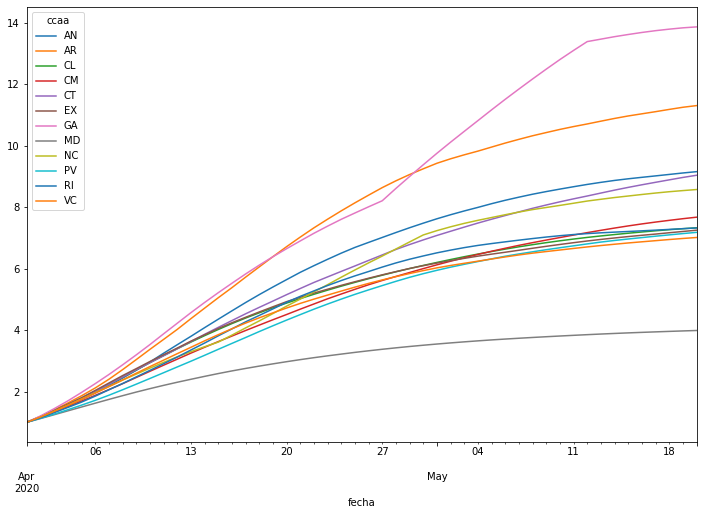

In [51]:
normalized_pivoted_smoothed_df.plot(figsize=(12, 8));

In [52]:
last_date = normalized_pivoted_smoothed_df.index.max()

In [53]:
normalized_pivoted_smoothed_df.loc[last_date].sort_values(ascending=False)

ccaa
GA    13.866154
AR    11.304624
AN     9.154583
CT     9.037274
NC     8.573241
CM     7.672993
CL     7.327573
RI     7.323034
EX     7.249507
PV     7.179070
VC     7.012149
MD     3.985493
Name: 2020-05-20 00:00:00, dtype: float64